<a href="https://colab.research.google.com/github/Knockout726/TheEggcellentPredictor/blob/main/Nargesfile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [117]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Mount at content/drive

In [118]:
import pandas as pd
import numpy as np
import os
import operator
import re
import sys

import seaborn as sns
from datetime import datetime
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

%matplotlib inline

In [119]:
df = pd.read_csv("/content/drive/MyDrive/The Eggcellent Predictor /Data/eggprice2.csv")

In [120]:
df.head(3)

,Program,Year,Month,day,Week Ending,Geo Level,State,watershed_code,Commodity,Data Item,Domain,Domain Category,price,chicken,broken eggs,production eggs,chicken production,chicken died,Hatch chicken,chicken lay
0,SURVEY,2023,2,1,NaN,NATIONAL,US TOTAL,0,EGGS,"EGGS - PRICE RECEIVED, MEASURED IN $ / DOZEN",TOTAL,NOT SPECIFIED,2.61,"50,031,000","181,566,000","8,225,300,000",NaN,NaN,"52,048,000","2,171"
1,SURVEY,2023,1,1,NaN,NATIONAL,US TOTAL,0,EGGS,"EGGS - PRICE RECEIVED, MEASURED IN $ / DOZEN",TOTAL,NOT SPECIFIED,3.00,"47,370,000","188,508,000","8,225,300,000",NaN,NaN,"50,748,000","2,413"
2,SURVEY,2022,4,1,NaN,NATIONAL,US TOTAL,0,EGGS,"EGGS - PRICE RECEIVED, MEASURED IN $ / DOZEN",TOTAL,NOT SPECIFIED,2.30,"53,971,000","190,571,000","8,225,300,000",NaN,NaN,"50,636,000","2,390"


In [121]:
print("Number of rows in dataset:", len(df))

Number of rows in dataset: 291


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291 entries, 0 to 290
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Program             291 non-null    object 
 1   Year                291 non-null    int64  
 2   Month               291 non-null    int64  
 3   day                 291 non-null    int64  
 4   Week Ending         0 non-null      float64
 5   Geo Level           291 non-null    object 
 6   State               291 non-null    object 
 7   watershed_code      291 non-null    int64  
 8   Commodity           291 non-null    object 
 9   Data Item           291 non-null    object 
 10  Domain              291 non-null    object 
 11  Domain Category     291 non-null    object 
 12  price               291 non-null    float64
 13  chicken             135 non-null    object 
 14  broken eggs         122 non-null    object 
 15  production eggs     183 non-null    object 
 16  chicken 

 Add code here to get NULL counts per column 

In [123]:

df.isna().sum()

Program                 0
Year                    0
Month                   0
day                     0
Week Ending           291
Geo Level               0
State                   0
watershed_code          0
Commodity               0
Data Item               0
Domain                  0
Domain Category         0
price                   0
chicken               156
broken eggs           169
production eggs       108
chicken production    277
chicken died          277
Hatch chicken         157
chicken lay           108
dtype: int64

useful summary statistics

In [124]:
df=df[:123]
print("Number of rows in dataset:", len(df))

Number of rows in dataset: 123


In [125]:

df.describe()

,Year,Month,day,Week Ending,watershed_code,price
count,123.000000,123.000000,123.0,0.0,123.0,123.000000
mean,2017.544715,6.398374,1.0,NaN,0.0,1.205480
std,2.976002,3.489422,0.0,NaN,0.0,0.623367
min,2012.000000,1.000000,1.0,NaN,0.0,0.483000
25%,2015.000000,3.000000,1.0,NaN,0.0,0.824500
50%,2018.000000,6.000000,1.0,NaN,0.0,1.070000
75%,2020.000000,9.000000,1.0,NaN,0.0,1.325000
max,2023.000000,12.000000,1.0,NaN,0.0,4.490000


pull numeric features

In [126]:
df['chicken'] = df['chicken'].str.replace(',','')
df['chicken'] = pd.to_numeric(df['chicken'])

In [127]:
 df['broken eggs'].info()


<class 'pandas.core.series.Series'>
RangeIndex: 123 entries, 0 to 122
Series name: broken eggs
Non-Null Count  Dtype 
--------------  ----- 
122 non-null    object
dtypes: object(1)
memory usage: 1.1+ KB


change data type to int and manipulate them.

In [128]:
df['broken eggs'] = df['broken eggs'].str.replace(',', '')
df['broken eggs'] = pd.to_numeric(df['broken eggs'])

In [129]:
df['production eggs'] = df['production eggs'].str.replace(',', '')
df['production eggs'] = pd.to_numeric(df['production eggs'])

In [130]:
df['chicken production'] = df['chicken production'].str.replace(',', '')
df['chicken production'] = pd.to_numeric(df['chicken production'])

In [131]:
df['chicken died'] = df['chicken died'].str.replace(',', '')
df['chicken died'] = pd.to_numeric(df['chicken died'])

In [132]:

df['Hatch chicken'] = df['Hatch chicken'].str.replace(',', '')
df['Hatch chicken'] = pd.to_numeric(df['Hatch chicken'])


In [133]:
df['chicken lay'] = df['chicken lay'].str.replace(',', '')
df['chicken lay'] = pd.to_numeric(df['chicken lay'])


When change all object to int now again check the info

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Program             123 non-null    object 
 1   Year                123 non-null    int64  
 2   Month               123 non-null    int64  
 3   day                 123 non-null    int64  
 4   Week Ending         0 non-null      float64
 5   Geo Level           123 non-null    object 
 6   State               123 non-null    object 
 7   watershed_code      123 non-null    int64  
 8   Commodity           123 non-null    object 
 9   Data Item           123 non-null    object 
 10  Domain              123 non-null    object 
 11  Domain Category     123 non-null    object 
 12  price               123 non-null    float64
 13  chicken             123 non-null    int64  
 14  broken eggs         122 non-null    float64
 15  production eggs     123 non-null    int64  
 16  chicken 

In [135]:
df['date'] = pd.to_datetime(df[['Year', 'Month', 'day']])
df.head(3)

,Program,Year,Month,day,Week Ending,Geo Level,State,watershed_code,Commodity,Data Item,...,Domain Category,price,chicken,broken eggs,production eggs,chicken production,chicken died,Hatch chicken,chicken lay,date
0,SURVEY,2023,2,1,NaN,NATIONAL,US TOTAL,0,EGGS,"EGGS - PRICE RECEIVED, MEASURED IN $ / DOZEN",...,NOT SPECIFIED,2.61,50031000,181566000.0,8225300000,NaN,NaN,52048000,2171,2023-02-01
1,SURVEY,2023,1,1,NaN,NATIONAL,US TOTAL,0,EGGS,"EGGS - PRICE RECEIVED, MEASURED IN $ / DOZEN",...,NOT SPECIFIED,3.00,47370000,188508000.0,8225300000,NaN,NaN,50748000,2413,2023-01-01
2,SURVEY,2022,4,1,NaN,NATIONAL,US TOTAL,0,EGGS,"EGGS - PRICE RECEIVED, MEASURED IN $ / DOZEN",...,NOT SPECIFIED,2.30,53971000,190571000.0,8225300000,NaN,NaN,50636000,2390,2022-04-01


In [136]:
df.describe()

,Year,Month,day,Week Ending,watershed_code,price,chicken,broken eggs,production eggs,chicken production,chicken died,Hatch chicken,chicken lay
count,123.000000,123.000000,123.0,0.0,123.0,123.000000,1.230000e+02,1.220000e+02,1.230000e+02,9.000000e+00,9.000000e+00,1.230000e+02,123.000000
mean,2017.544715,6.398374,1.0,NaN,0.0,1.205480,4.741420e+07,1.900354e+08,8.225300e+09,8.891811e+09,1.310310e+08,4.927707e+07,2339.577236
std,2.976002,3.489422,0.0,NaN,0.0,0.623367,5.099009e+06,1.419773e+07,0.000000e+00,2.675123e+08,2.247767e+07,5.533585e+06,79.478011
min,2012.000000,1.000000,1.0,NaN,0.0,0.483000,3.709900e+07,1.485300e+08,8.225300e+09,8.533800e+09,1.021045e+08,3.654400e+07,2090.000000
25%,2015.000000,3.000000,1.0,NaN,0.0,0.824500,4.370850e+07,1.818470e+08,8.225300e+09,8.688700e+09,1.068549e+08,4.512950e+07,2310.500000
50%,2018.000000,6.000000,1.0,NaN,0.0,1.070000,4.756300e+07,1.905275e+08,8.225300e+09,8.913800e+09,1.326253e+08,4.962600e+07,2351.000000
75%,2020.000000,9.000000,1.0,NaN,0.0,1.325000,5.089750e+07,1.984330e+08,8.225300e+09,9.130700e+09,1.509159e+08,5.250000e+07,2396.500000
max,2023.000000,12.000000,1.0,NaN,0.0,4.490000,5.997000e+07,2.242760e+08,8.225300e+09,9.222100e+09,1.640673e+08,6.231900e+07,2465.000000


In [137]:

df_with_numeric_features = df.select_dtypes(exclude=['object', 'datetime64[ns]'])
print("Numeric features:")
for col in df_with_numeric_features:
    print(f"{col}")

Numeric features:
Year
Month
day
Week Ending
watershed_code
price
chicken
broken eggs
production eggs
chicken production
chicken died
Hatch chicken
chicken lay


pull non-numeric features

In [138]:

df_with_non_numeric_features = df.select_dtypes(include=['object'])
print("Non-numeric columns:")
for col in df_with_non_numeric_features:
    print(f"{col}")

Non-numeric columns:
Program
Geo Level
State
Commodity
Data Item
Domain
Domain Category


Remove duplicates
Never assume there are no duplicates in your data!

In [139]:
column_names = df.columns.tolist()
column_names

['Program',
 'Year',
 'Month',
 'day',
 'Week Ending',
 'Geo Level',
 'State',
 'watershed_code',
 'Commodity',
 'Data Item',
 'Domain',
 'Domain Category',
 'price',
 'chicken',
 'broken eggs',
 'production eggs',
 'chicken production',
 'chicken died',
 'Hatch chicken',
 'chicken lay',
 'date']

In [140]:
#remove duplicates rows

df.drop_duplicates(subset=column_names, keep='last', inplace=True)
print("Number of rows after removing duplicates", len(df))


Number of rows after removing duplicates 123


Drop null values from month column.


In [141]:
df.dropna(subset = ["date"], inplace=True)


In [143]:
from pandas.core.indexes.datetimes import date
x=df['date']
y=df['price']
df.plot(x,y)

ValueError: ignored

count    123.000000
mean       1.205480
std        0.623367
min        0.483000
25%        0.824500
50%        1.070000
75%        1.325000
max        4.490000
Name: price, dtype: float64


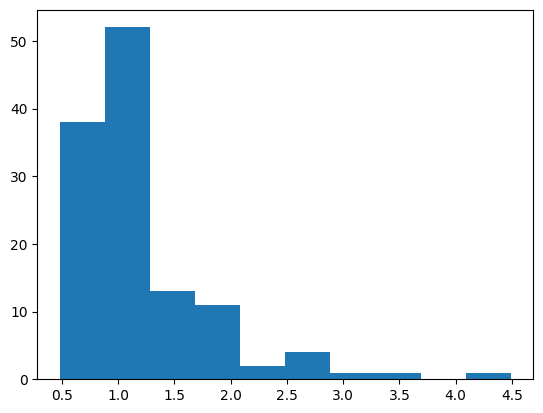

In [144]:
plt.hist(df.price,bins=10)
print(df.price.describe())

In [145]:
df['Year'].value_counts()

2022    12
2021    12
2020    12
2019    12
2018    12
2017    12
2016    12
2015    12
2014    12
2013    12
2023     2
2012     1
Name: Year, dtype: int64

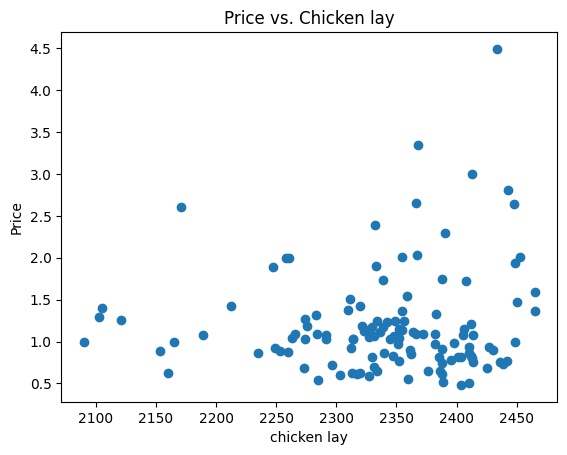

In [146]:
price = df['price']
chicken = df['chicken lay']

# create a scatter plot
plt.scatter(chicken , price)
plt.xlabel('chicken lay')
plt.ylabel('Price')
plt.title('Price vs. Chicken lay')
plt.show()

check data is stationery or not?

In [147]:
from statsmodels.tsa.stattools import adfuller
x=df['price']
result=adfuller(x)
print("ADF Stataics ",result[0])
print("p-value",result[1])
print("critical values",result[5])
if result[1]<=0.05:
    print("fail to reject null hypothese h1 , it mean data is stationary")
else:
    print("Reject the null hypotheise , it mean data is not stationary")

ADF Stataics  -4.600527545449679
p-value 0.00012888074714791786
critical values 72.62552585074343
fail to reject null hypothese h1 , it mean data is stationary


<Axes: >

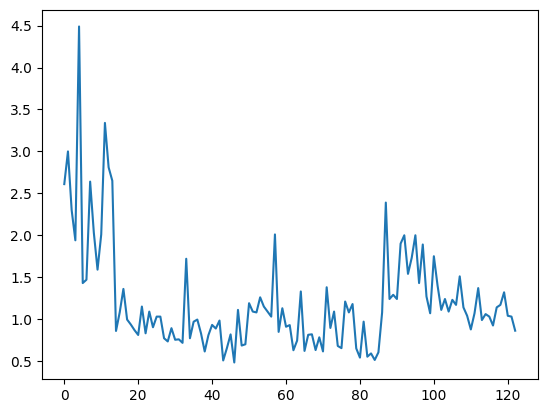

In [148]:
#Now checking data is stationary or not using graphs.
df['price'].plot()

For ARIMA forcasting we need two parameter q and q that P is  parameter is an integer that confirms how many lagged series are going to be used to forecast periods ahead.and q is the number of lagged forecast error terms in the prediction equation.now we want to calculate P and q

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


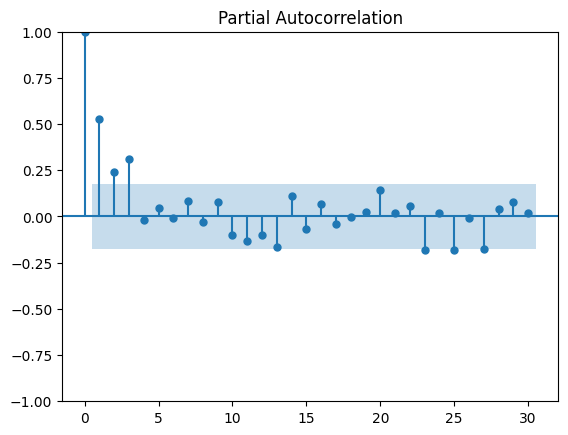

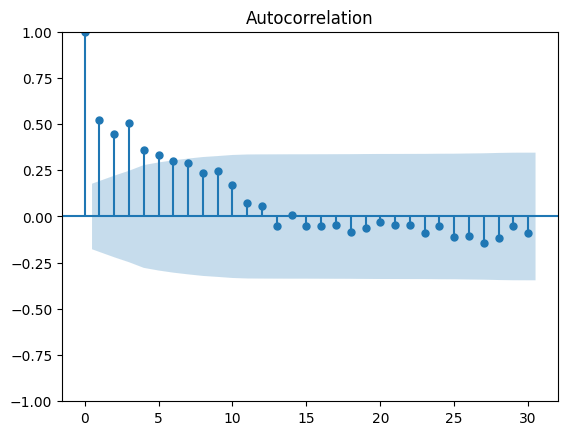

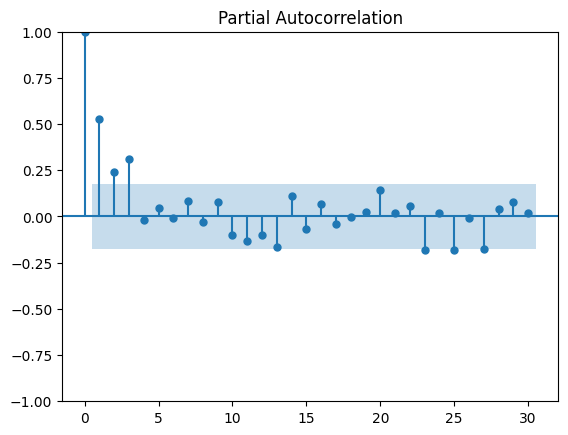

In [149]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(df['price'].iloc[1:],lags=30)
plot_pacf(df['price'].iloc[1:],lags=30)

P=3 and q =2 

<Axes: >

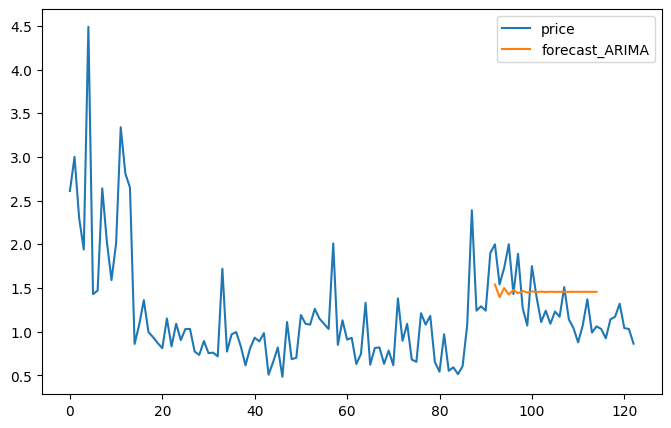

In [150]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(df['price'], order=(1,1,2))
result = model.fit()
df['forecast_ARIMA'] = result.predict(start = 92, end= 114, dynamic= True)  
df[['price', 'forecast_ARIMA']].plot(figsize=(8, 5))


Check how SARIMA will perform on this seasonal data.

In [151]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df['price'],order=(2,1,2),seasonal_order=(2,1,2,6))
result=model.fit()

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: >

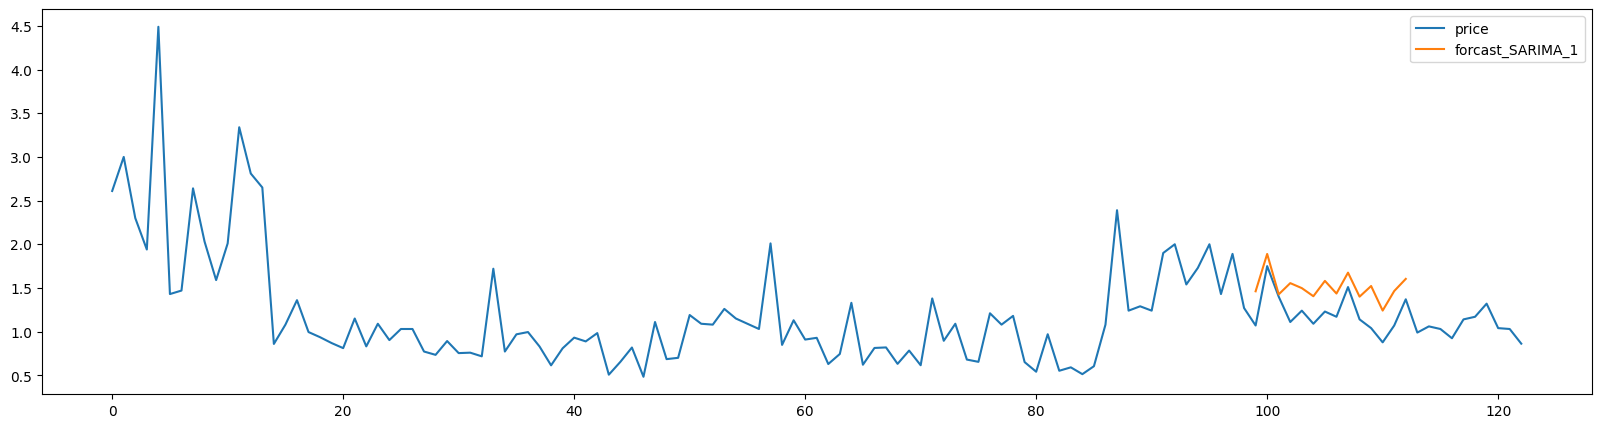

In [152]:
df['forcast_SARIMA_1']=result.predict(start=99, end=112, dynamic=True)
df[['price','forcast_SARIMA_1']].plot(figsize=(20, 5))

SARIMA model is working well. because data is seasonal.

So, we are try to predict future forecasting using SARIMA model.



In [154]:

import datetime
from dateutil.relativedelta import relativedelta
start = datetime.datetime.strptime("1969-07-01", "%Y-%m-%d")
date_list = [start + relativedelta(months=x) for x in range(0,12)]
future_prediction = pd.DataFrame(index=date_list, columns= df.columns)
future = pd.DataFrame(columns=df.columns) 
df= pd.concat([df, future])

**Predict future forecasting using SARIMA**

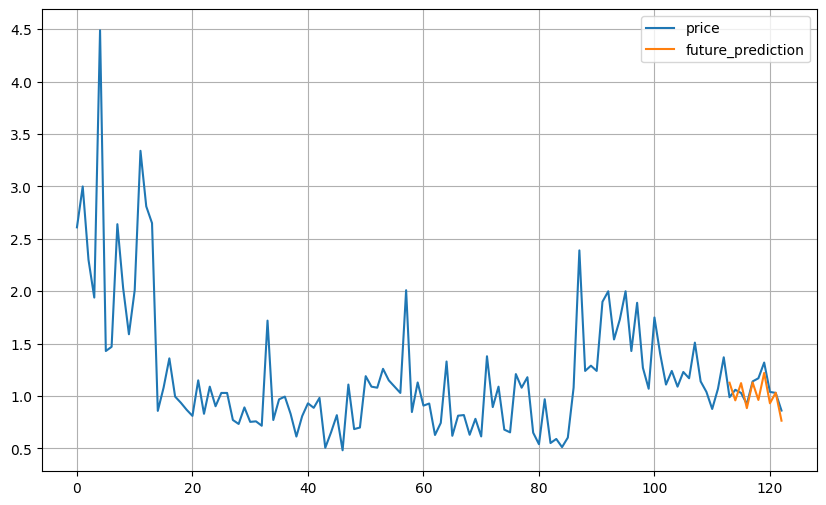

In [155]:
df['future_prediction']=result.predict(start=113, end=130, dynamic=True)
df[['price','future_prediction']].plot(figsize=(10, 6))
plt.grid(True)

<Axes: >

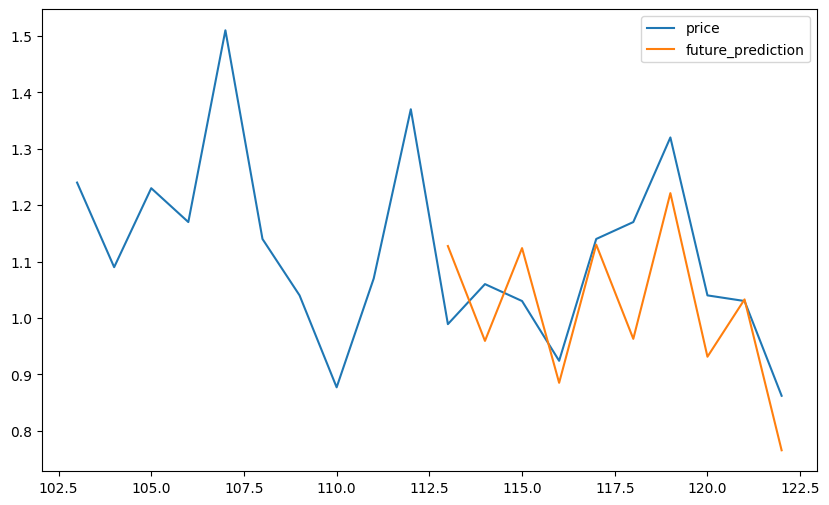

In [157]:
df['future_prediction'] = result.predict(start=113, end=130, dynamic=True)
df[['price', 'future_prediction']].iloc[-20:].plot(figsize=(10, 6))